# Drawing for vector paraxial fields

In [1]:
%load_ext autoreload
%autoreload 2
%load_ext line_profiler
%matplotlib inline
%config InlineBackend.figure_format = 'png'
from pprint import pprint

For vector fields, there are special drawings. Here we explain how to extract information from these drawings

In [2]:
from diffractio import degrees, mm, nm, np, plt, sp, um
from diffractio.scalar_fields_XY import Scalar_field_XY
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_sources_XY import Scalar_source_XY

from diffractio.vector_paraxial_masks_XY import Vector_paraxial_mask_XY
from diffractio.vector_paraxial_sources_XY import Vector_paraxial_source_XY

from diffractio.utils_drawing import concatenate_drawings, draw_several_fields

number of processors: 32


In [3]:
from matplotlib import rcParams
rcParams['figure.figsize']=[10,8]
rcParams['figure.dpi']=200

# Definition of a vector wave

In [4]:
length = 500 * um
num_data = 256
wavelength = 0.6328 * um

x0 = np.linspace(-200*um, 200*um, 512)
y0 = np.linspace(-200*um, 200*um, 512)

u0=Scalar_source_XY(x0,y0,wavelength)
u0.gauss_beam(A=1, r0=(0,0), w0=(100*um,100*um))

EM = Vector_paraxial_source_XY(x0, y0, wavelength)
EM.radial_wave(u=u0, r0=(0,0), radius=(200,200))
EM.RS(z=10*mm, new_field=False)

Ex,Ey=EM.get()

EM.reduce_matrix=''

## Draw intensity

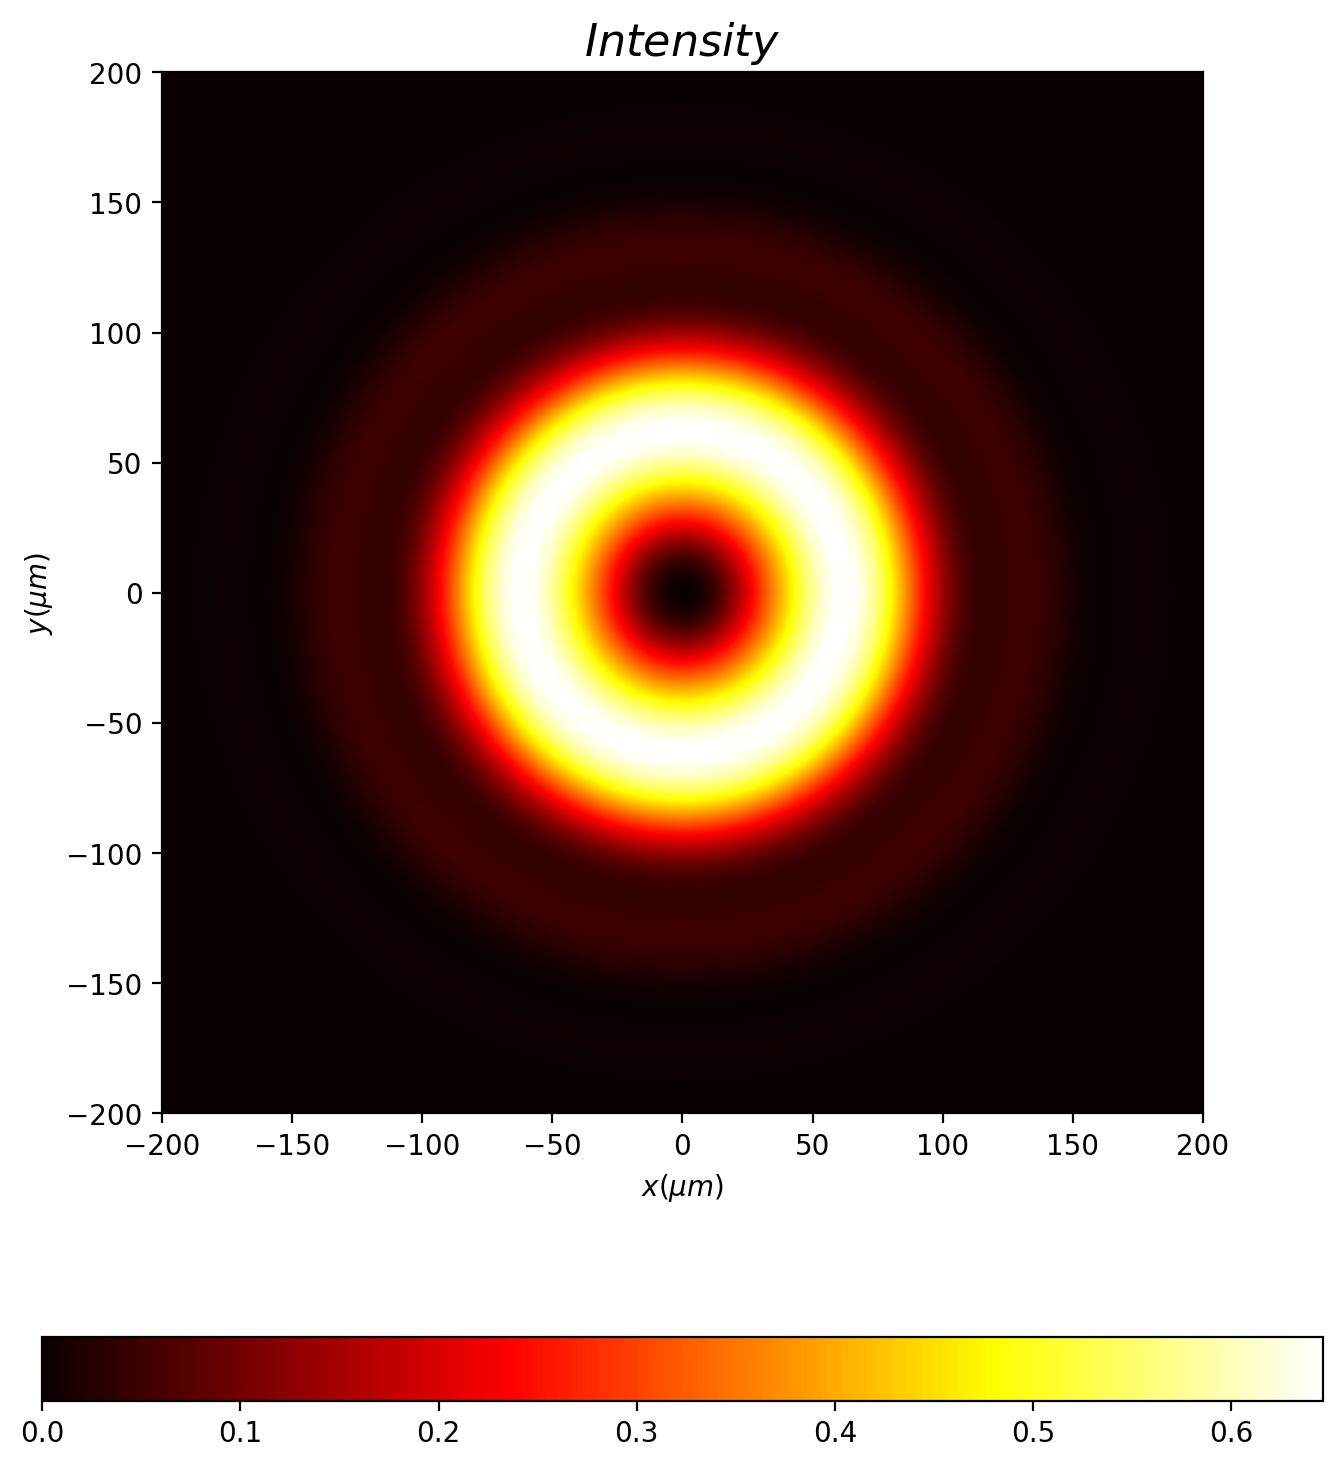

In [5]:
#EM.__draw_intensity__();
EM.draw(kind='intensity');

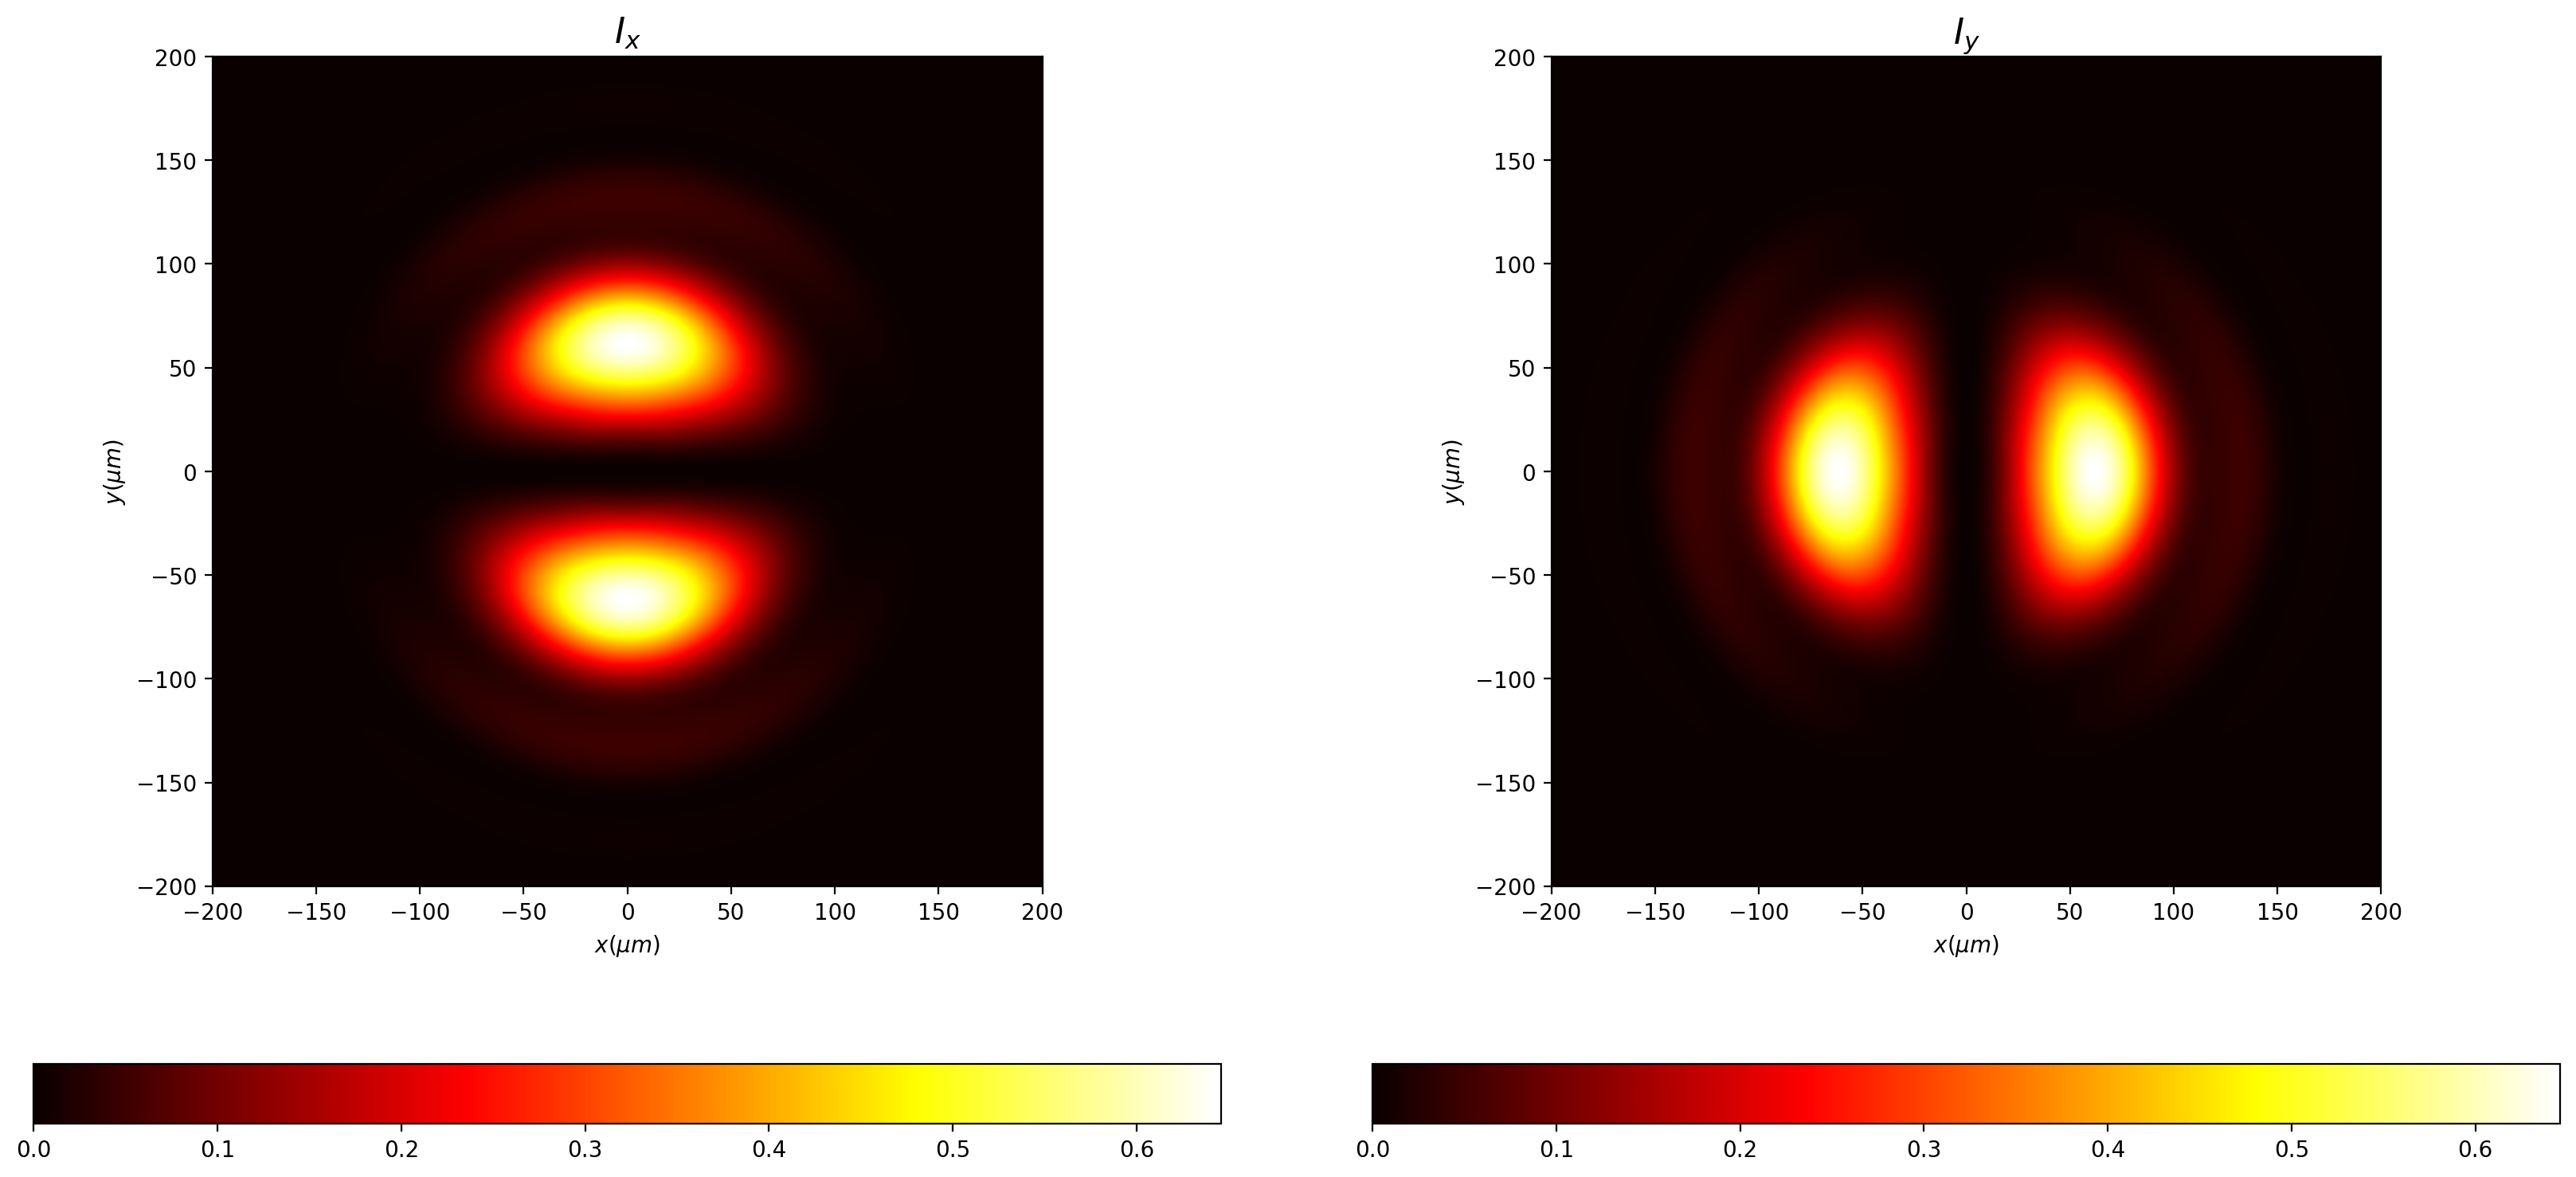

In [6]:
#EM.__draw_intensities__();
EM.draw(kind='intensities');

## Draw phase

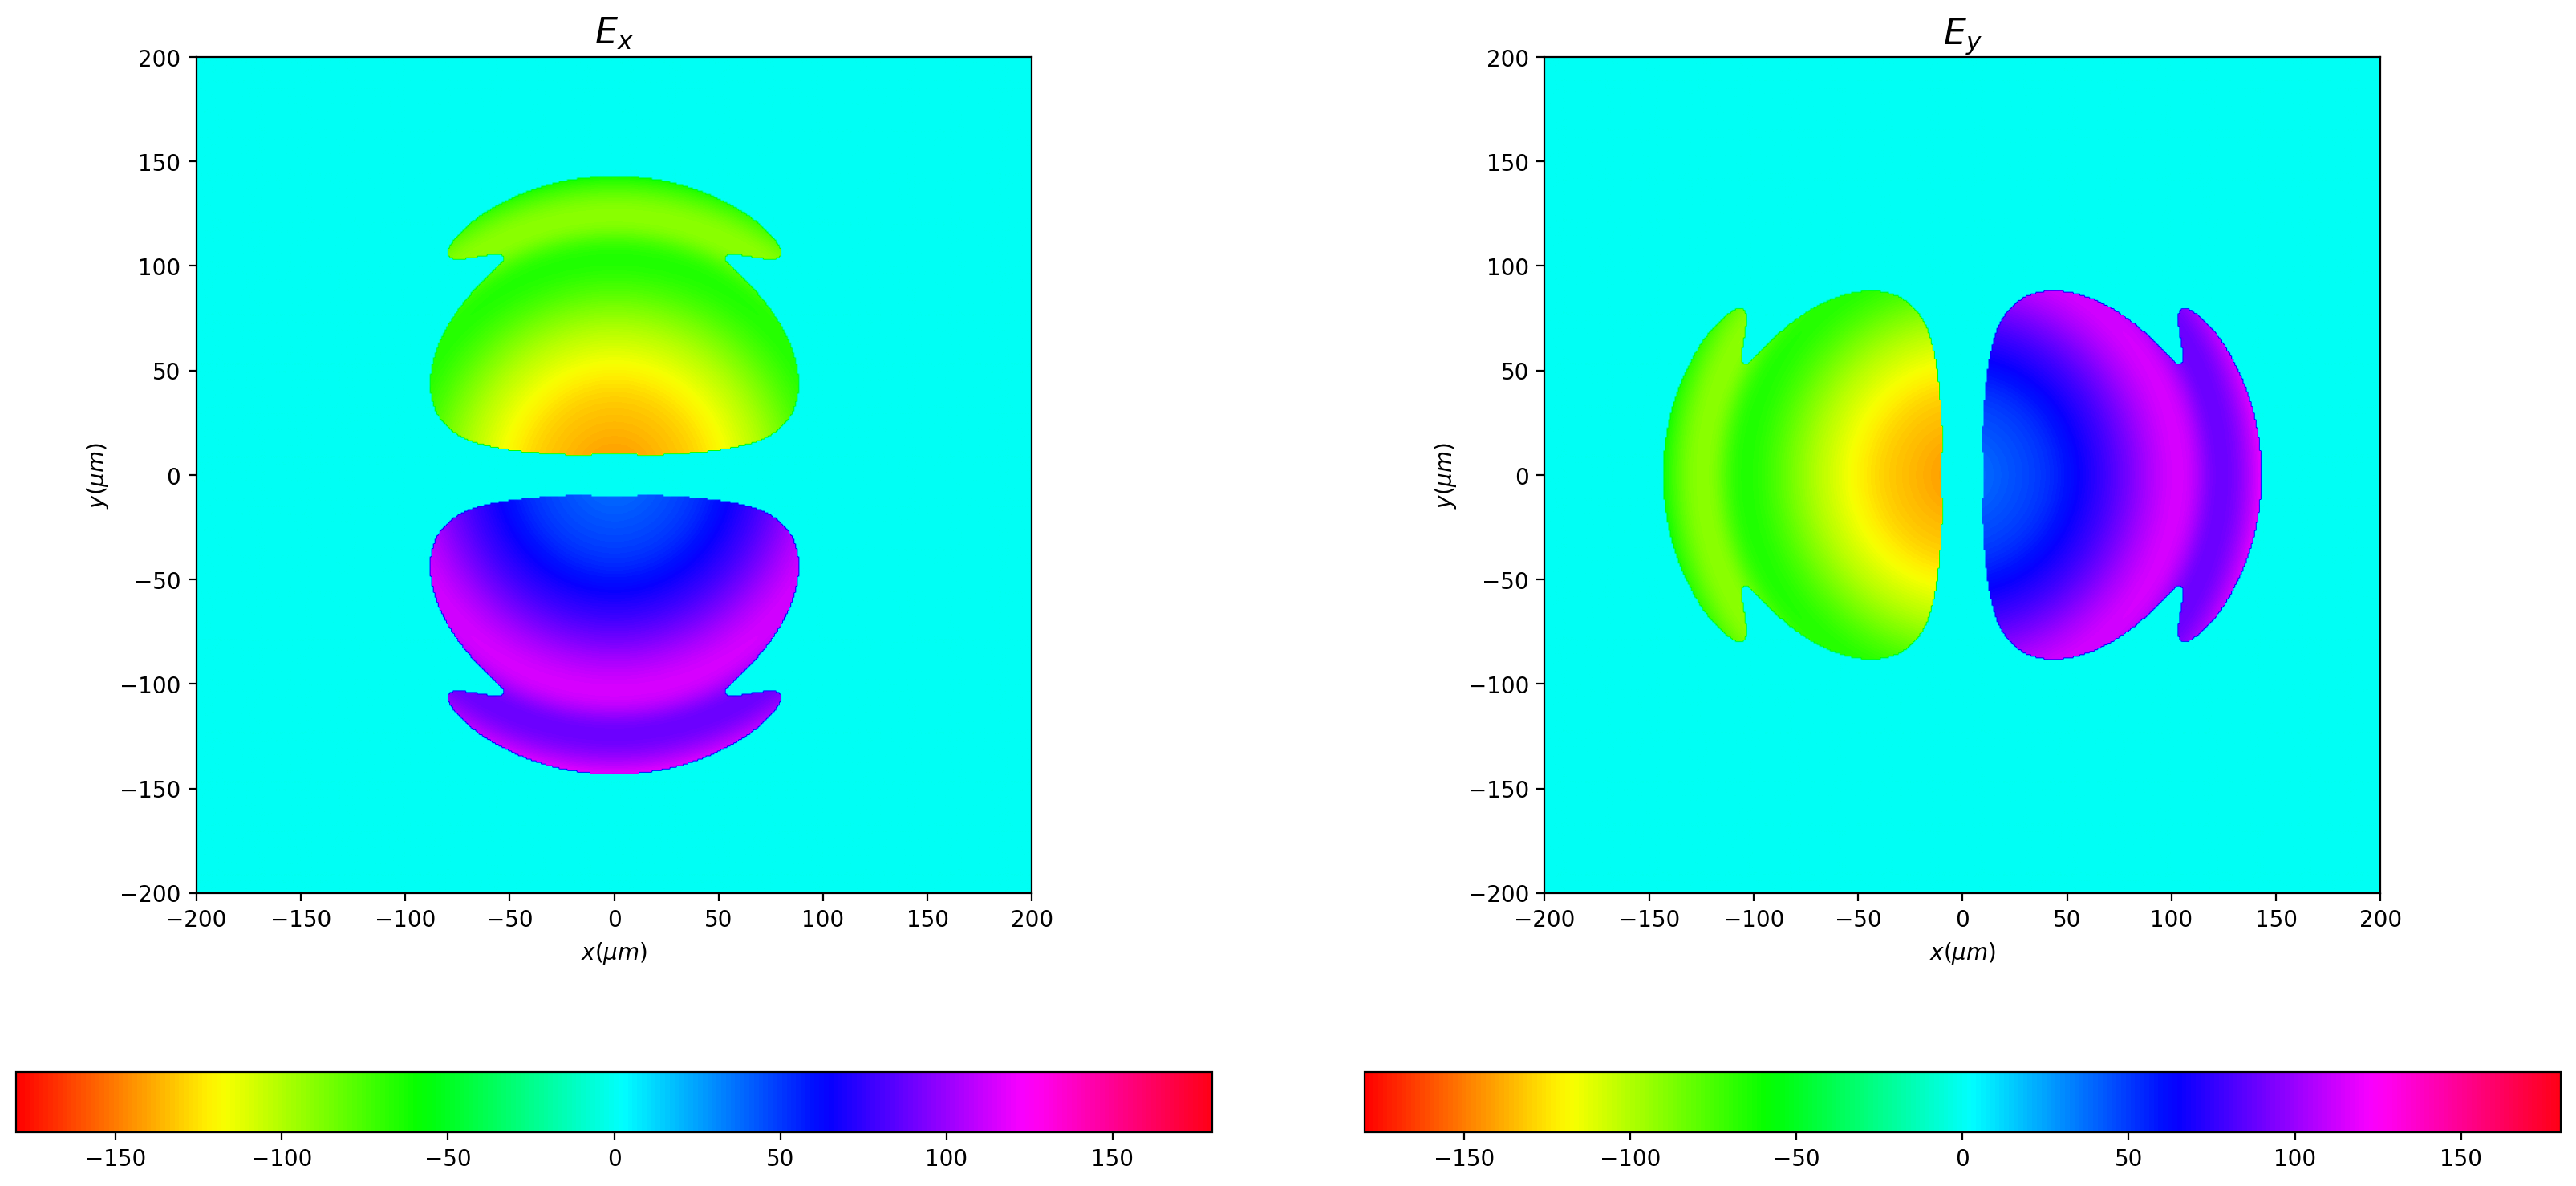

In [7]:
#EM.__draw_phases__();
EM.draw(kind='phases');

## draw field

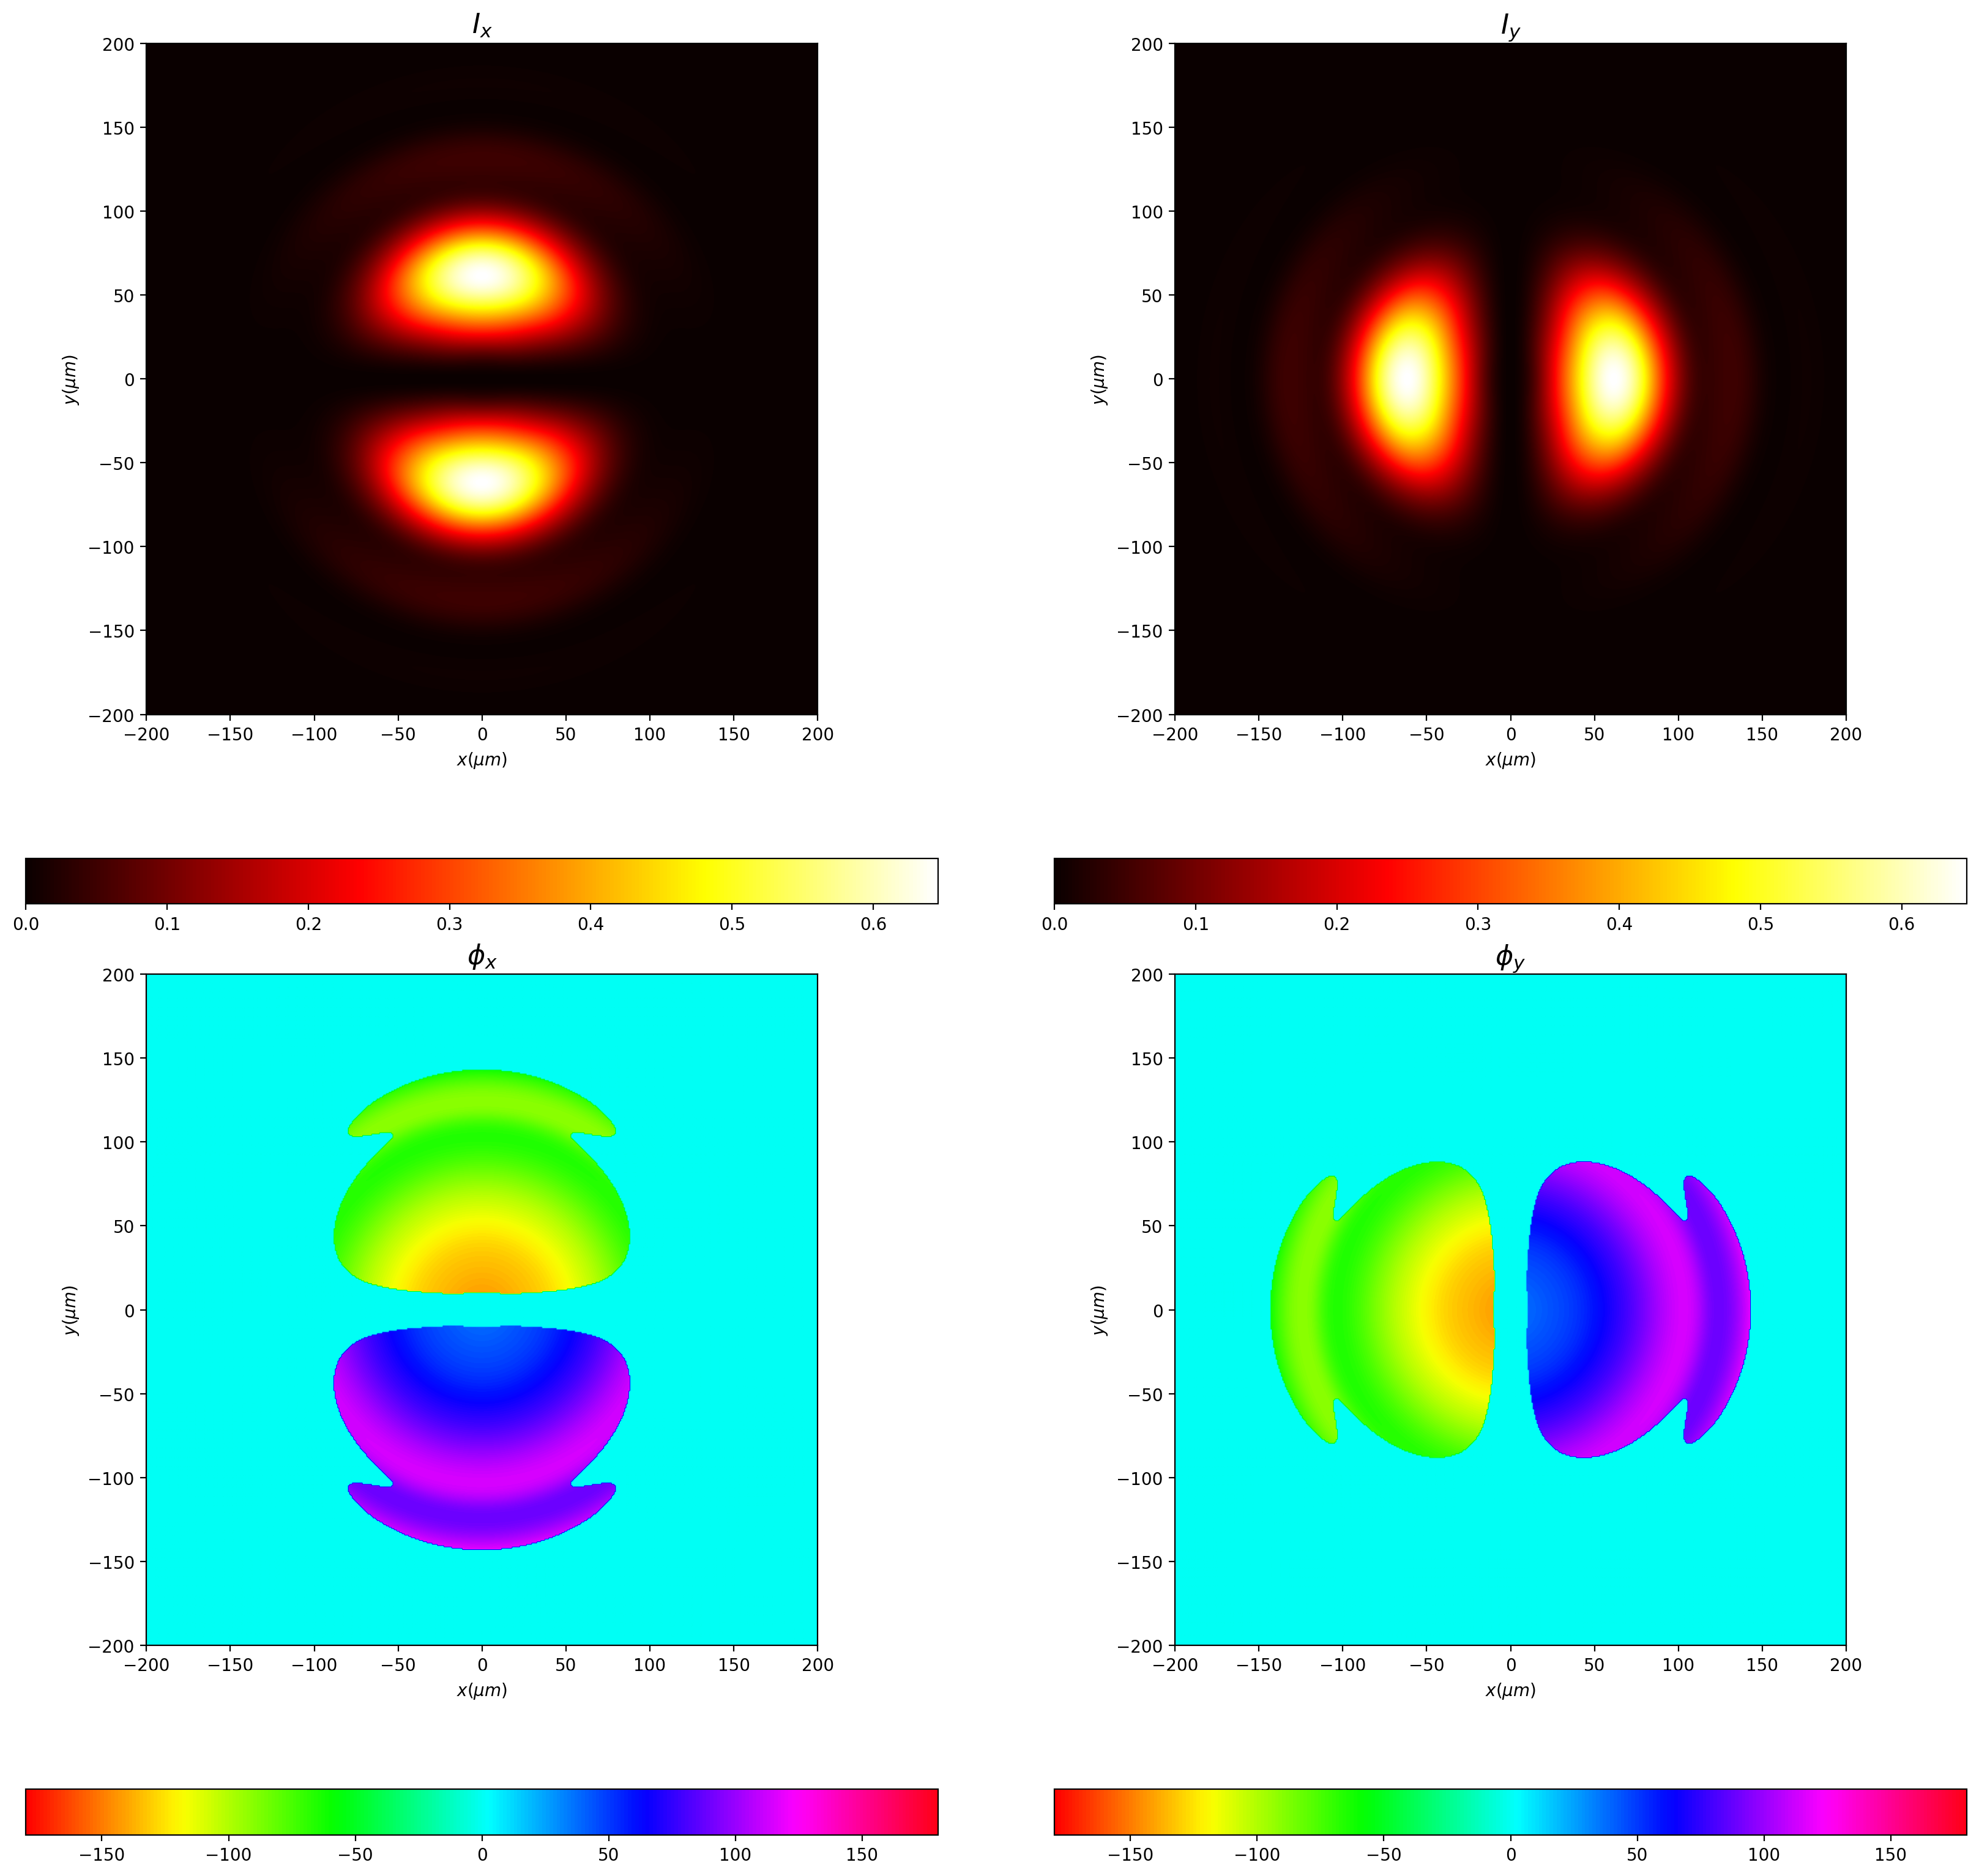

In [8]:
#EM.__draw_field__();
EM.draw(kind='fields');

## Draw Stokes

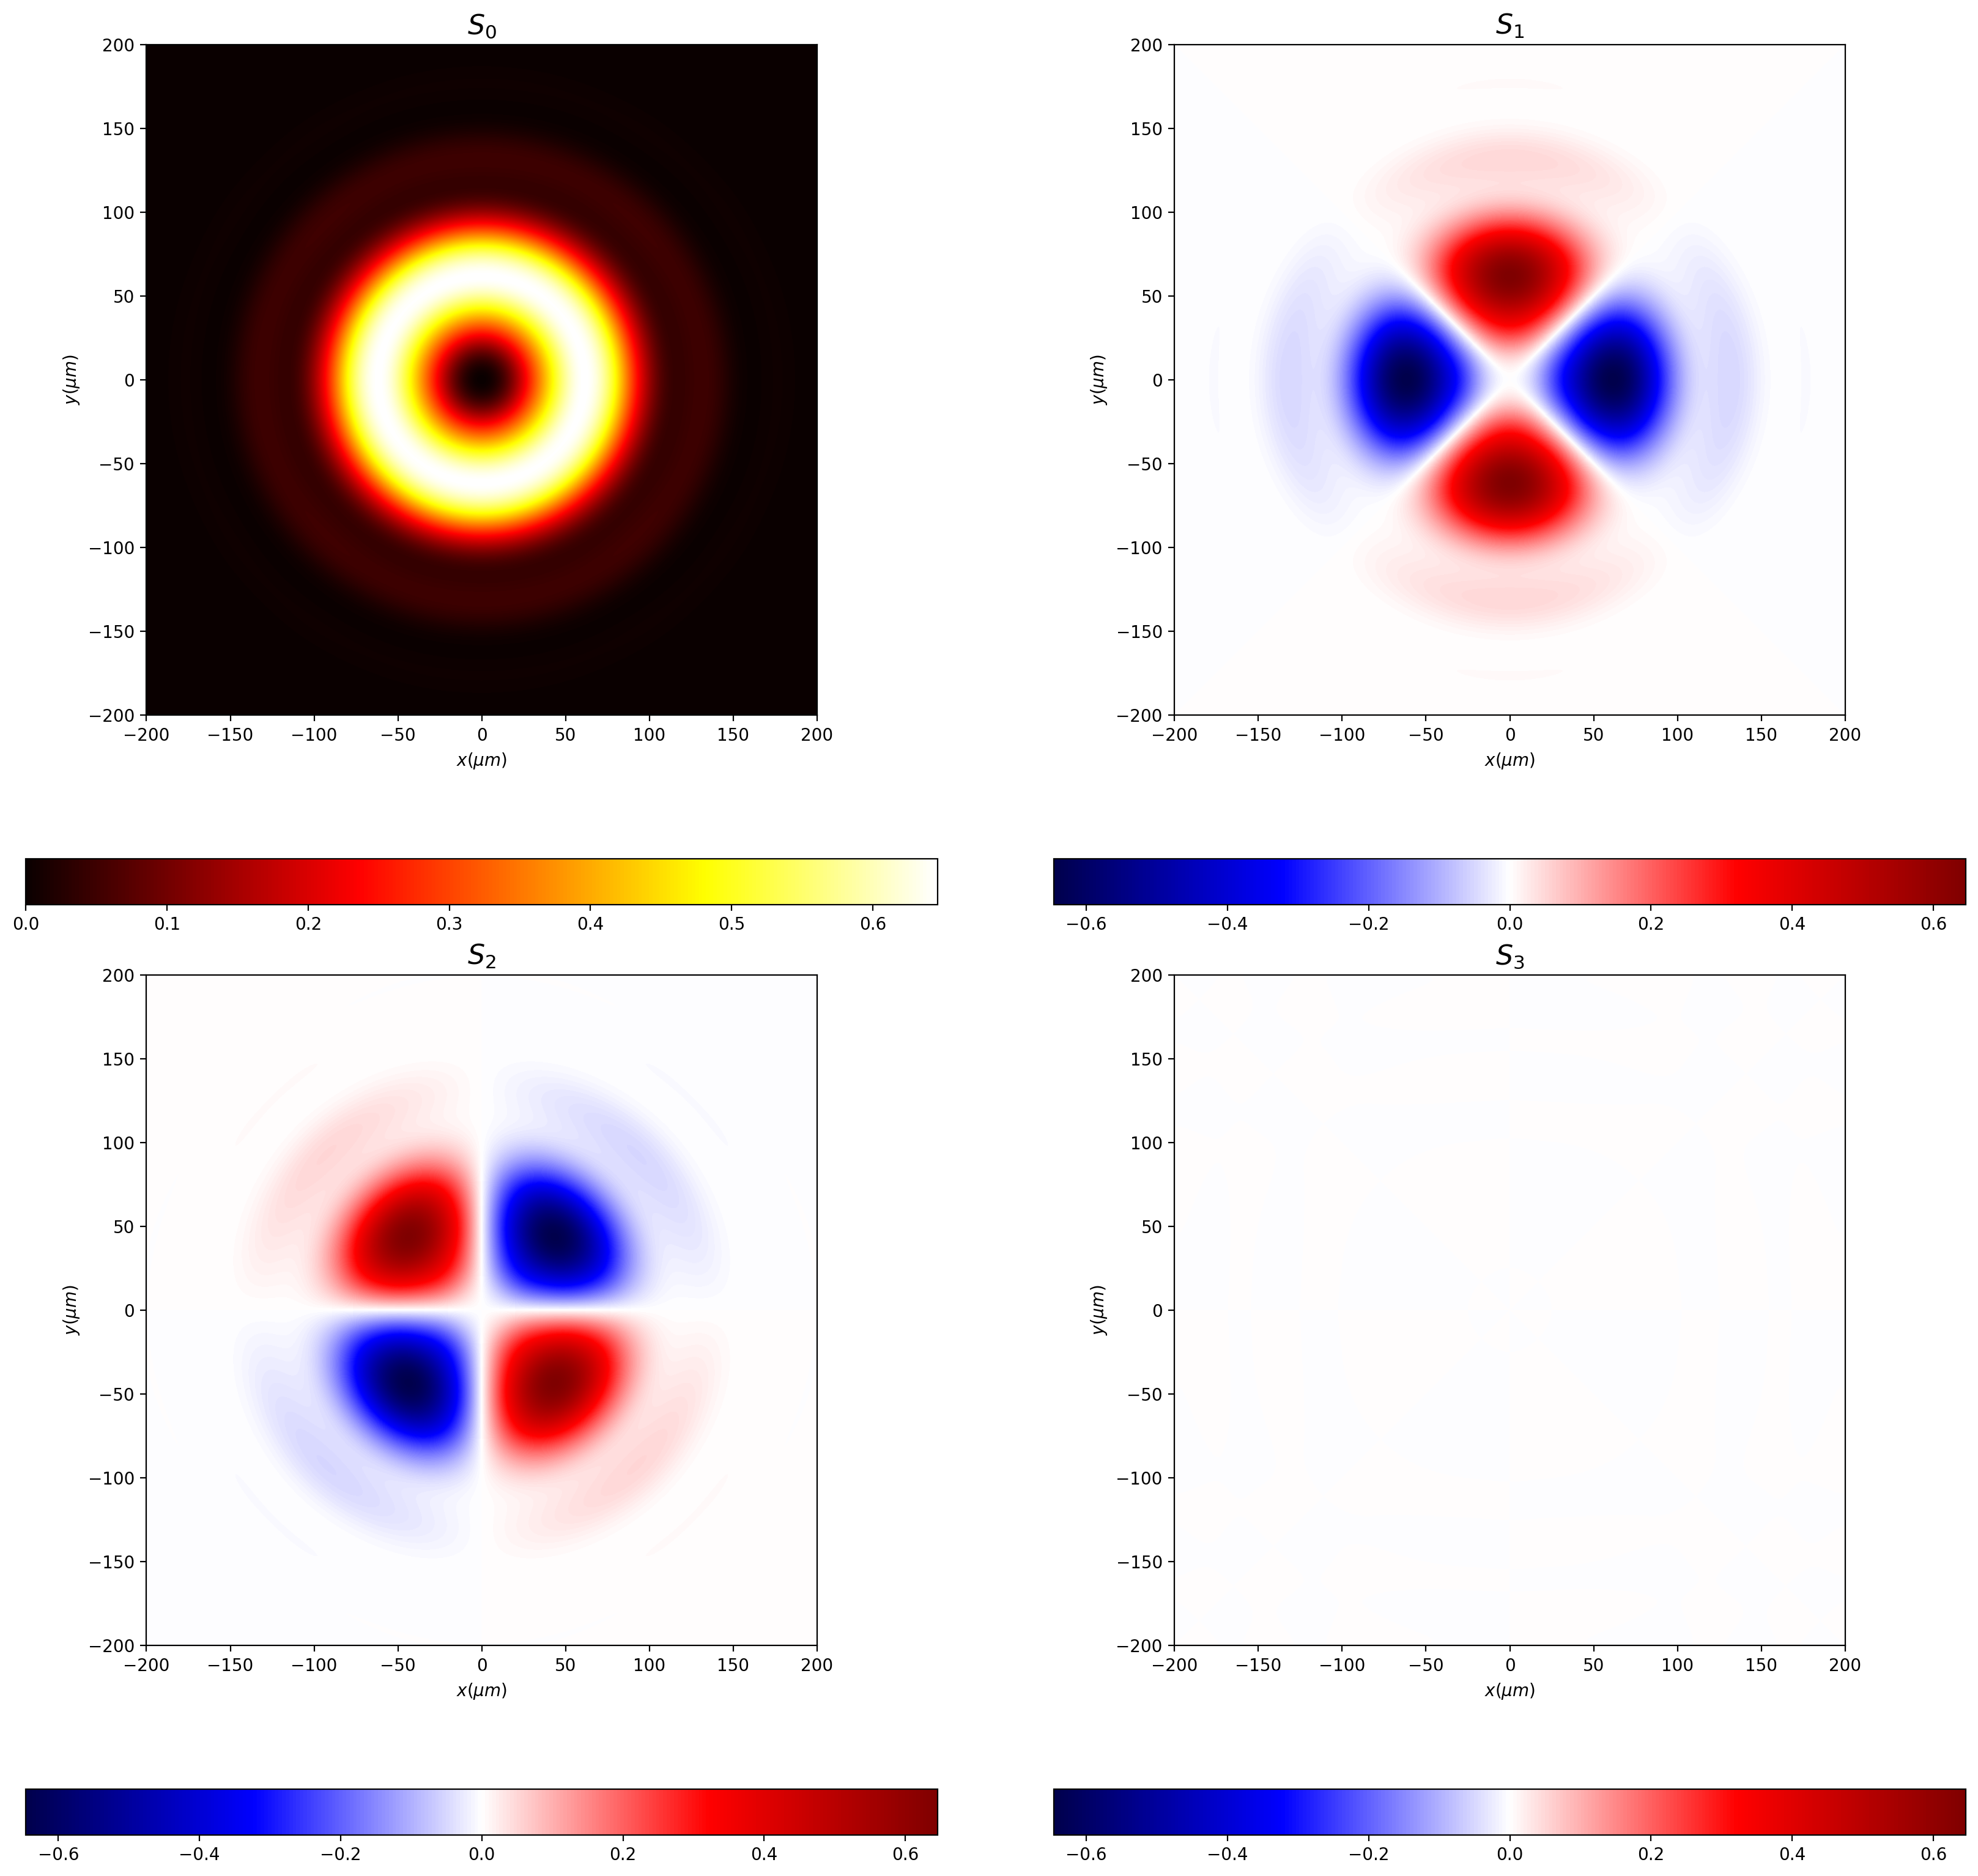

In [9]:
EM.draw(kind='stokes');

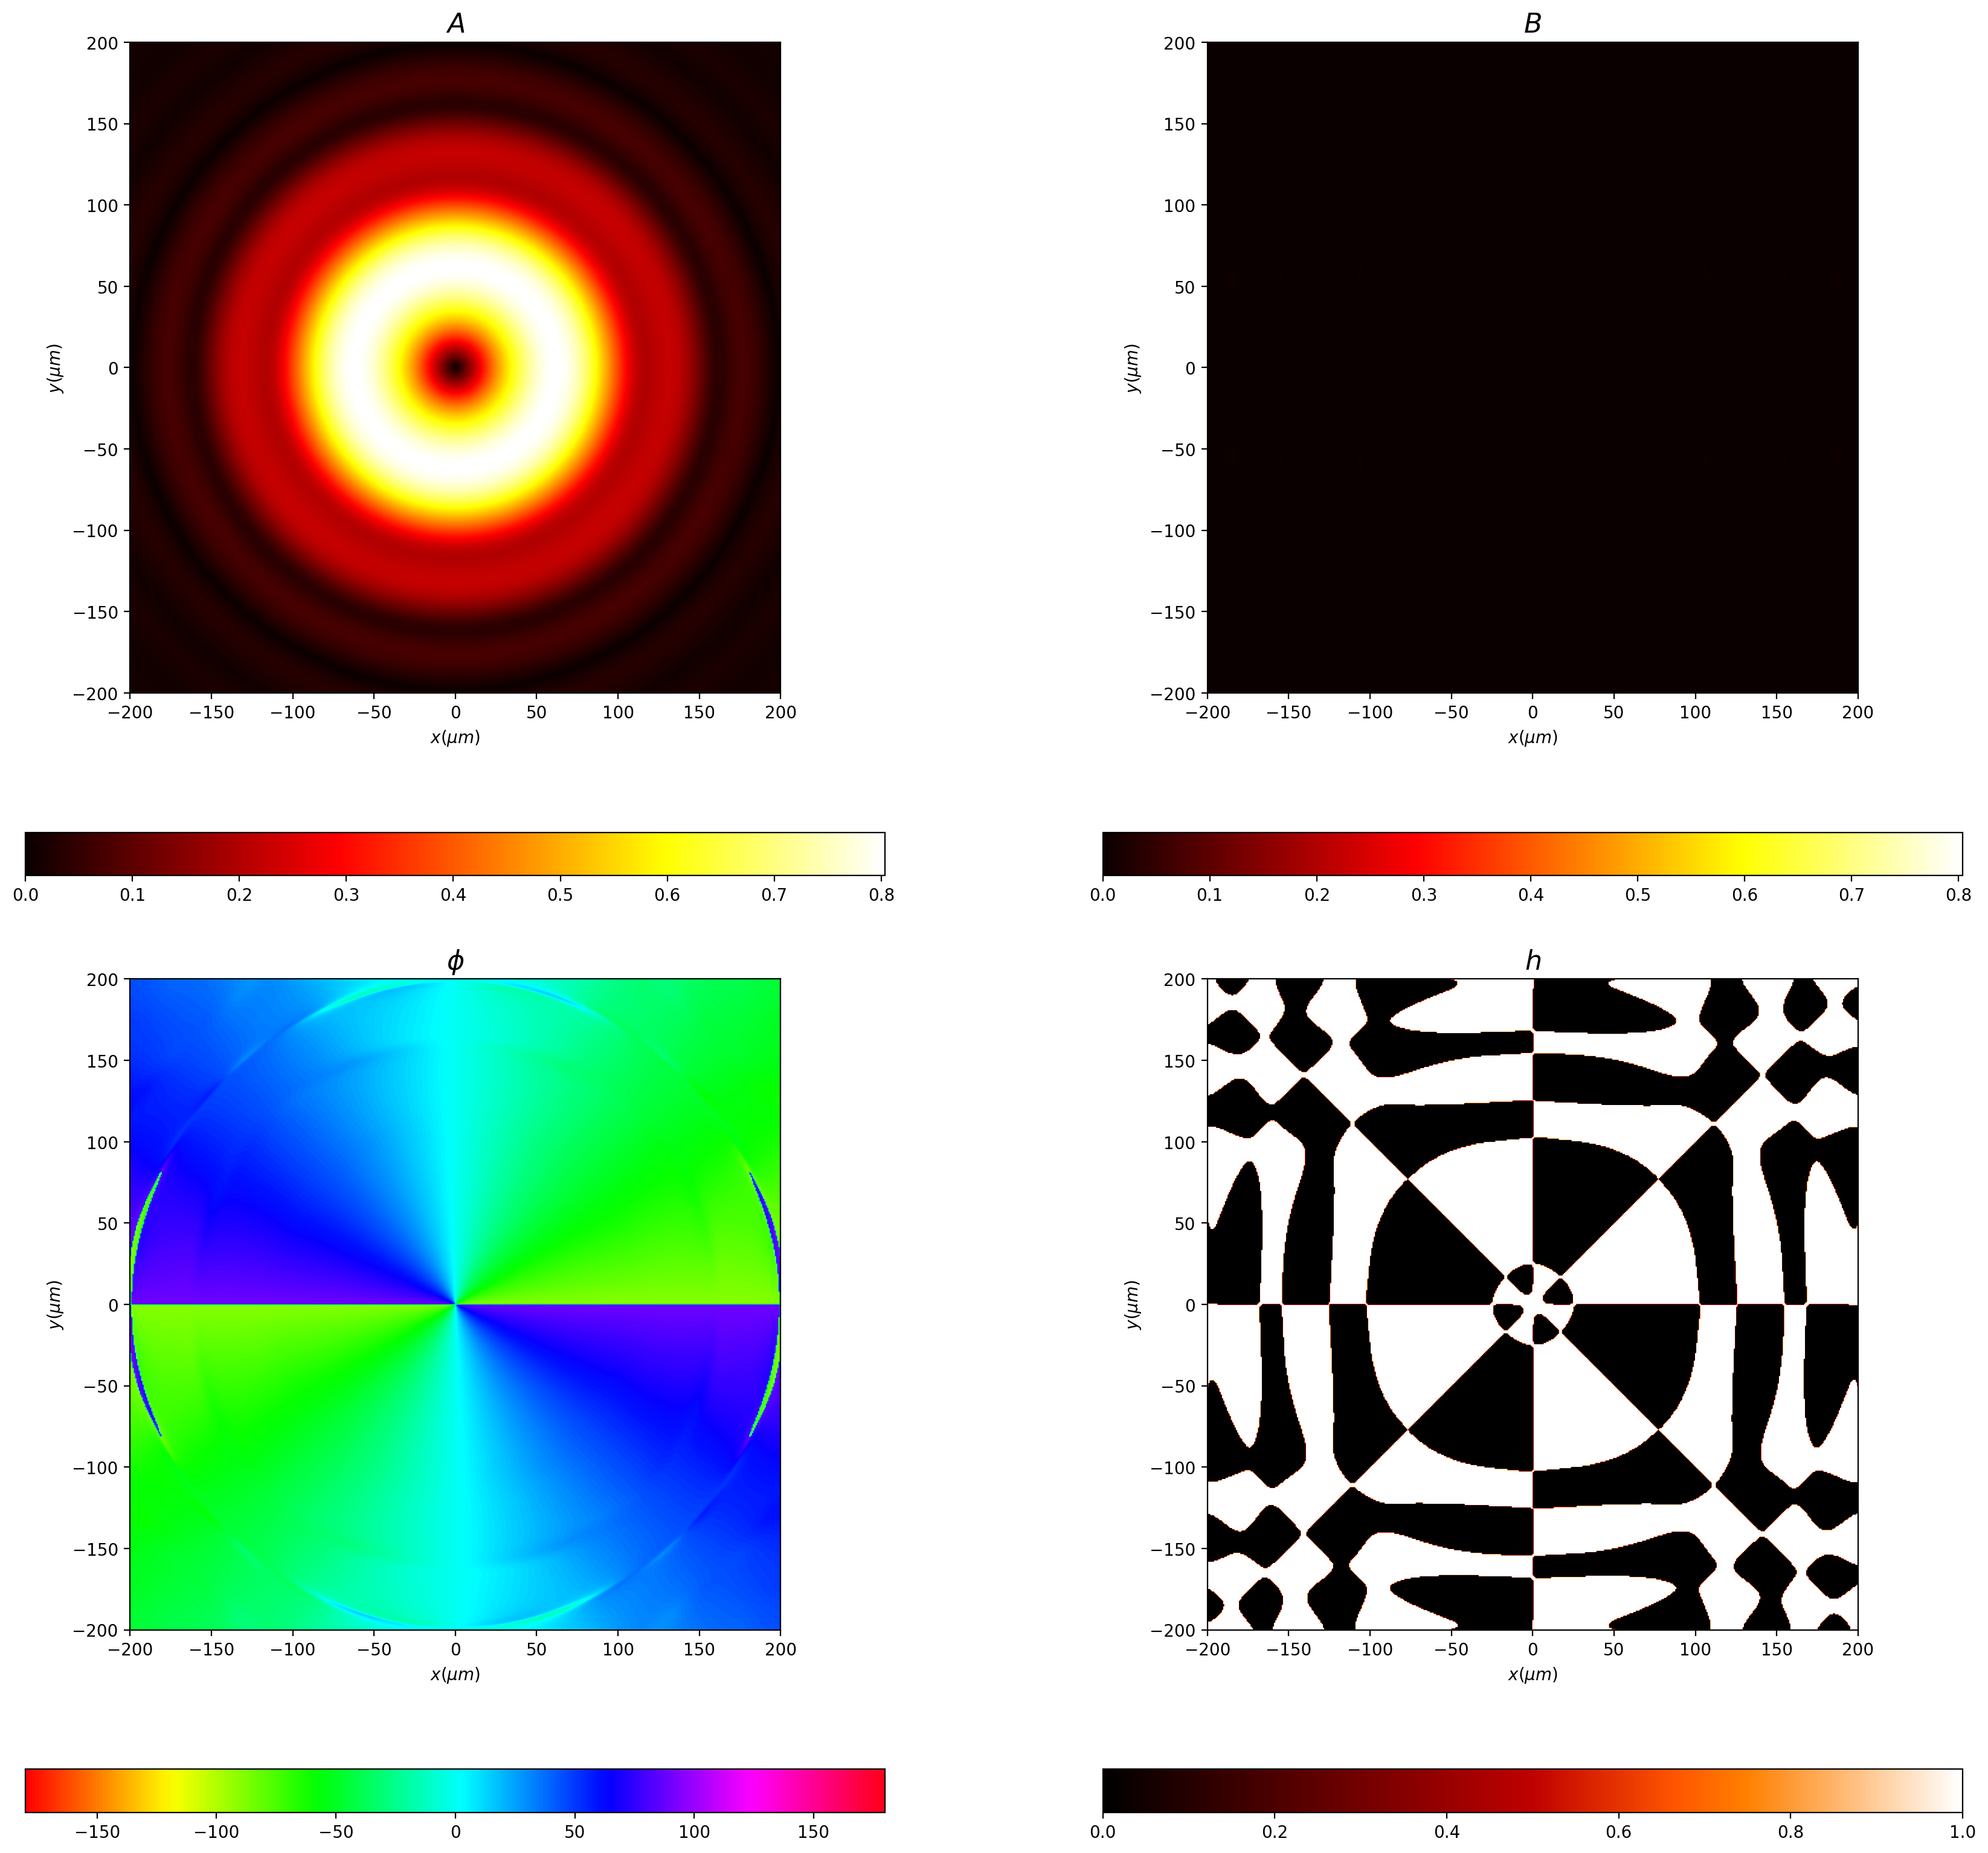

In [10]:
#EM.__draw_param_ellipse__();
EM.draw(kind='param_ellipse');

## Polarizations ellipses

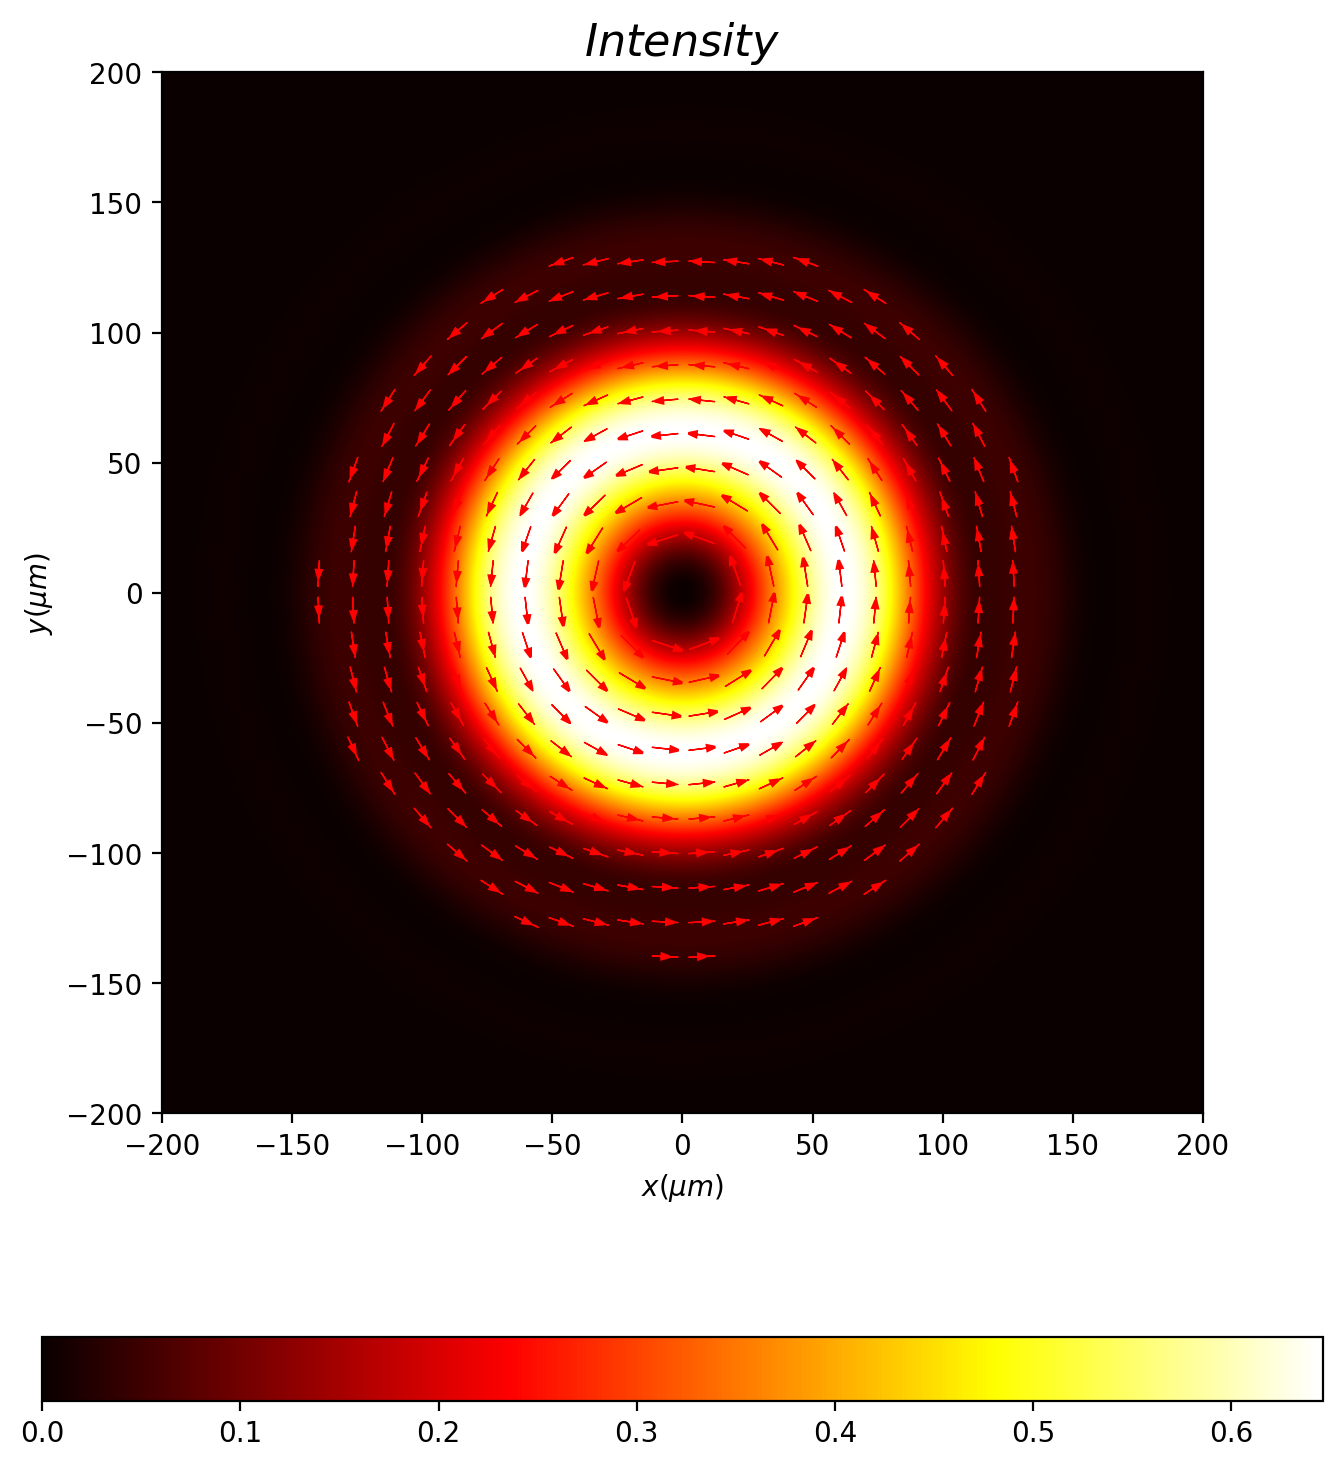

In [11]:
EM.__draw_ellipses__(
    num_ellipses=(30, 30),
    amplification=0.75,
    color_line='r',
    line_width=.5,
    draw_arrow=True,
    head_width=2,
    ax=False)

This polarizaation ellipses can also be drawn at any other drawing, provided that we have the axis associated to this drawing

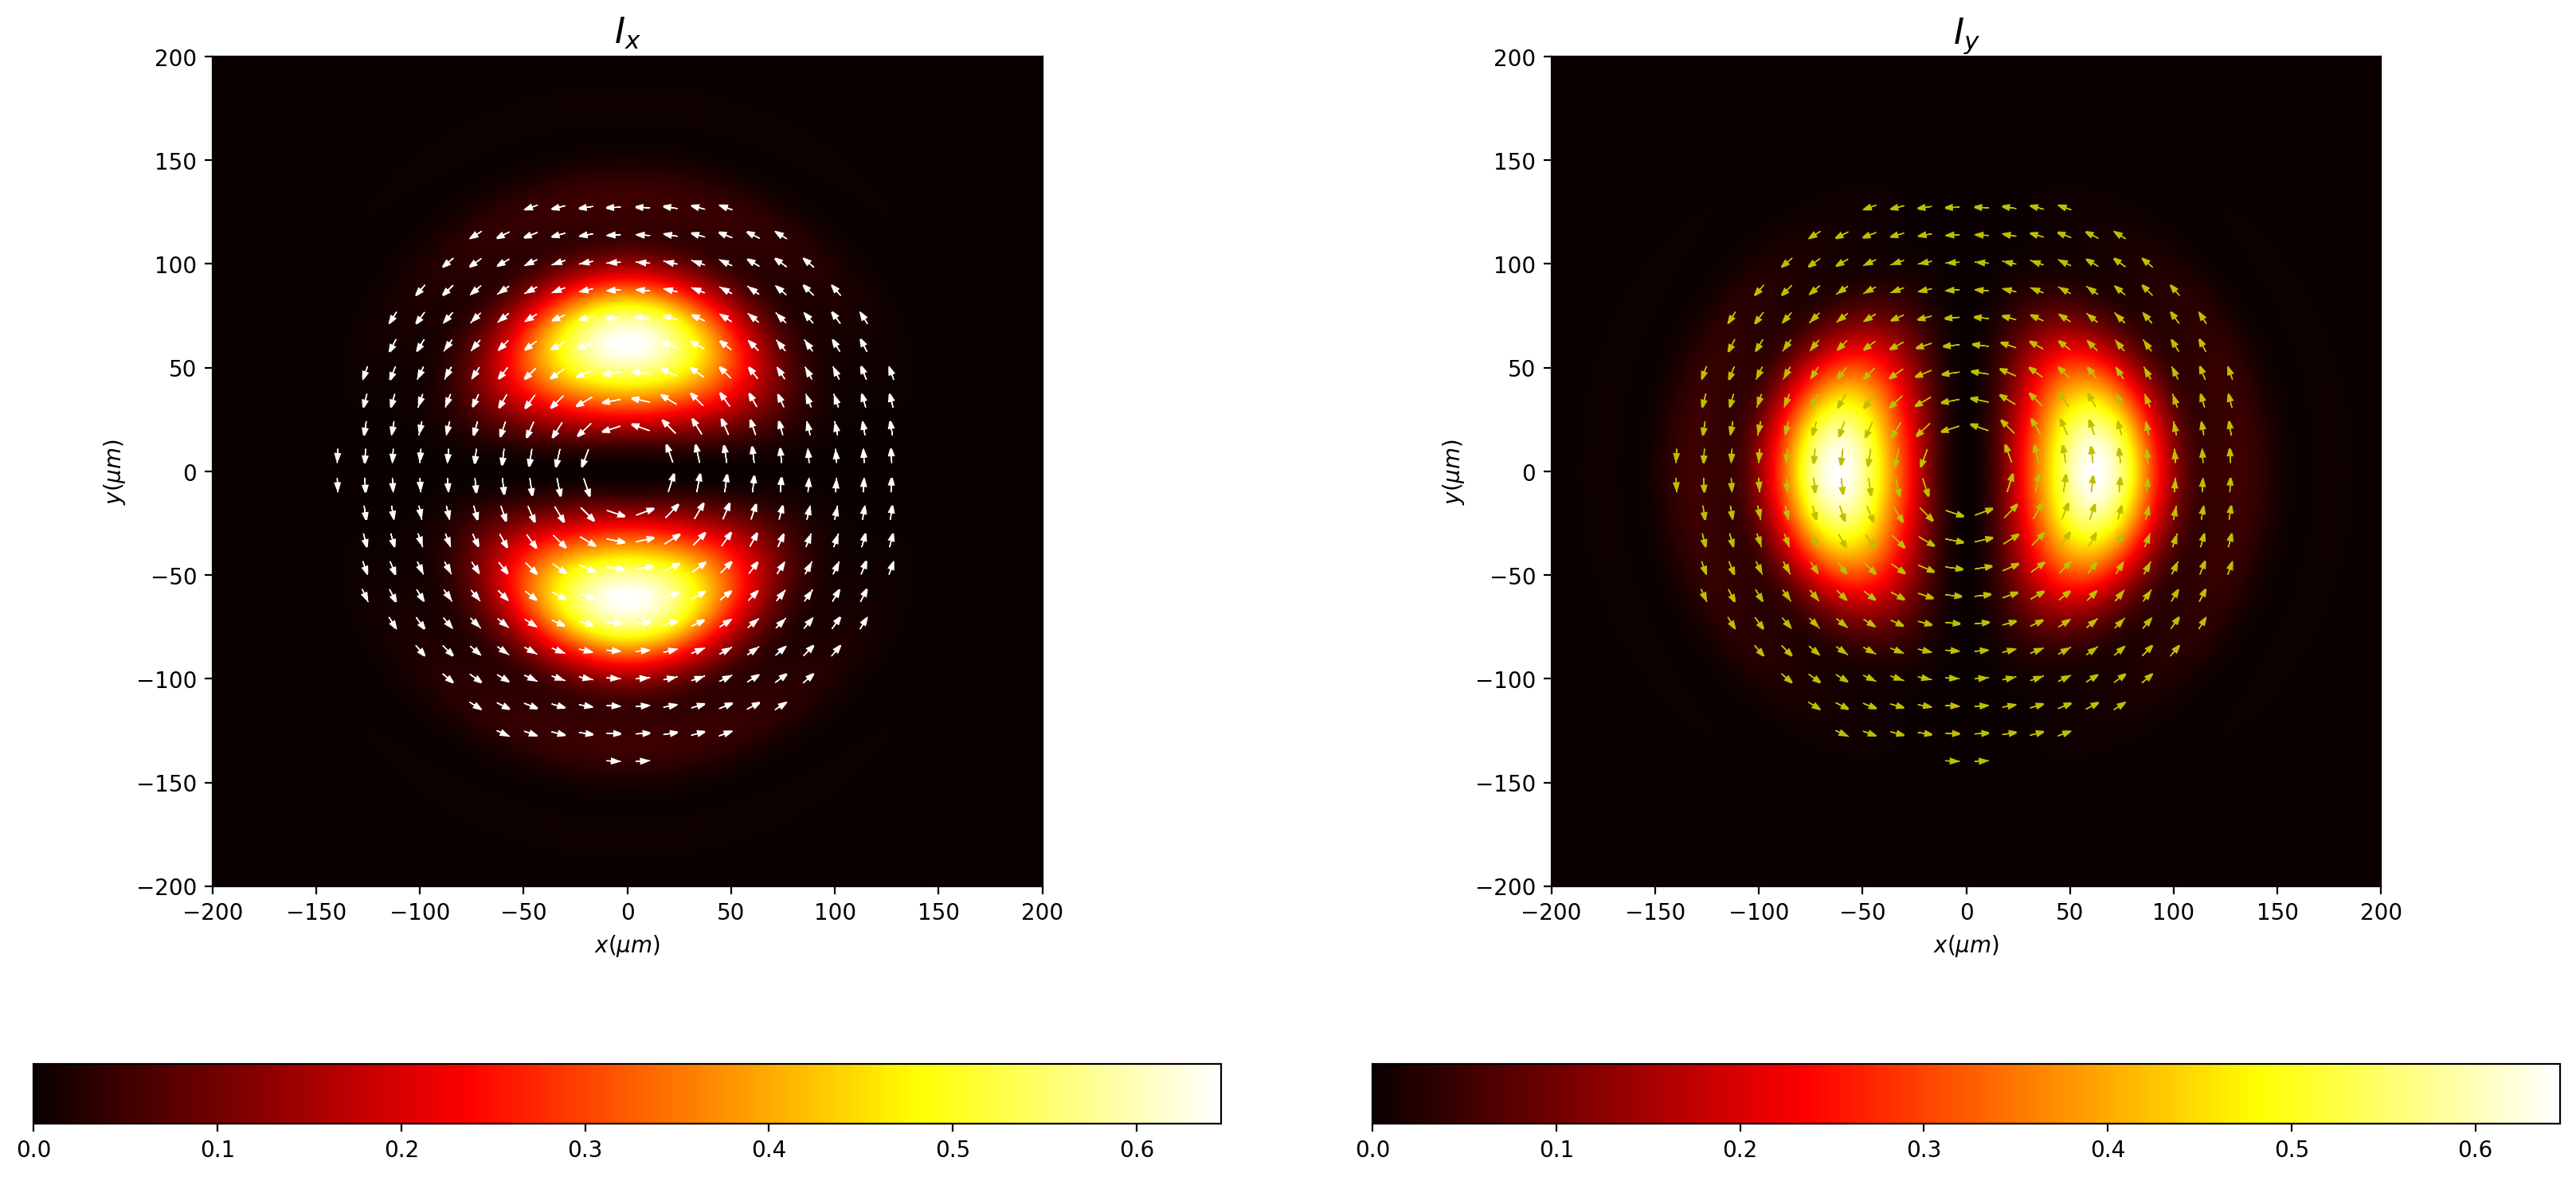

In [12]:
h1,h2=EM.draw(kind='intensities')
EM.__draw_ellipses__(
    num_ellipses=(30, 30),
    amplification=0.5,
    color_line='w',
    line_width=.5,
    draw_arrow=True,
    head_width=2,
    ax=h1)

EM.__draw_ellipses__(
    num_ellipses=(30, 30),
    amplification=0.5,
    color_line='y',
    line_width=.5,
    draw_arrow=True,
    head_width=2,
    ax=h2)